# **Rezbin AI Model v2.0 Development**

In [13]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader

Opening our TrashNet dataset via `datasets` from `torchvision`

In [14]:
from pathlib import Path

# opening dataset
dataset_path = Path('./dataset-resized/')
full_dataset = datasets.ImageFolder(root=dataset_path)
idx_labels = full_dataset.class_to_idx

Splitting our dataset by 80% training, and 20% testing

In [15]:
from torch.utils.data import random_split
from torchvision.transforms import v2

# Define train and test size
train_size = int(0.8 * len(full_dataset))
test_size = int(len(full_dataset) - train_size)
    
# splitting the dataset
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

Plotting our dataset to get a glance of our dataset

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

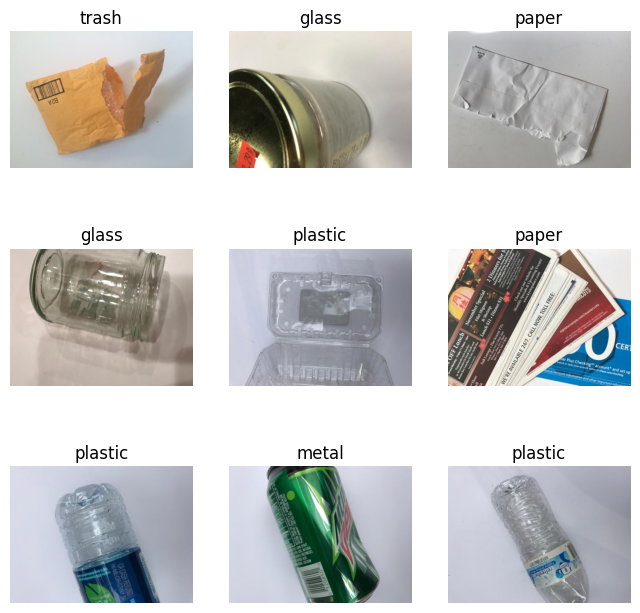

In [18]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(list(idx_labels.keys())[list(idx_labels.values()).index(label)])
    plt.axis("off")
    plt.imshow(img)
plt.show()

Let's define our basic preprocessing transformation pipeline, and plot it to see what it looks like. 

In [40]:
# defining transformation pipeline
transform = v2.Compose([
    v2.Resize((128,128)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset.dataset.transform = transform
test_dataset.dataset.transform = transform

In [41]:
train_dataloader = DataLoader(train_dataset,
                              batch_size=64,
                              shuffle=True)

test_dataloader = DataLoader(test_dataset,
                             batch_size=64,
                             shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6726604..2.2489083].


Feature batch shape: torch.Size([64, 3, 128, 128])
Labels batch shape: torch.Size([64])


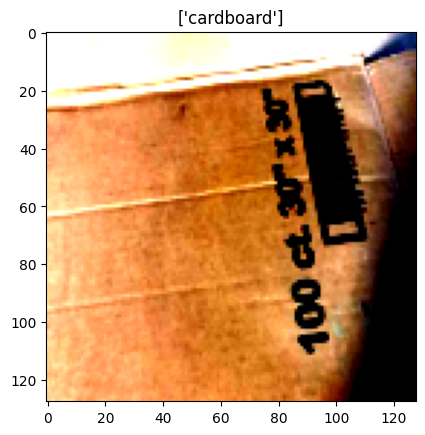

In [42]:
# Sample display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0)) # permute cause image is already transformed by preprocessing pipeline
plt.title([key for key, val in idx_labels.items() if val == label])
plt.show()